# The Battle Of Neighborhoods

## Importing all the libraries required

In [2]:
# for data cleaning and wrangling
import pandas as pd
import numpy as np

# for various visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for retrive the location coordinates for various locations
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

# for plotting the neighborhoods on the map
import folium

# for handling requests 
import requests  

# for clustering
from sklearn.cluster import KMeans

# for plotting different clusters in different colors
import matplotlib.cm as cm
import matplotlib.colors as colors

# for evaluation and chosing the optimum K means clustering model
! pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

## Getting the regions and neighborhoods in Bangalore

In [3]:
central = ['Cantonment', 'Domlur', 'Indiranagar', 'Jeevanbheemanagar', 'Malleswaram', 'Pete', 'Sadashivanagar', 'Seshadripuram', 'Shivajinagar', 'Ulsoor', 'Vasanth Nagar']
central_region = []

for i in range(len(central)):
    
    central_region.append('Central')

central_df = pd.DataFrame({'Region':central_region, 'Neighborhood': central})


In [4]:
eastern = ['Bellandur', 'CV Raman Nagar', 'Hoodi', 'Krishnarajapuram', 'Mahadevapura', 'Marathahalli', 'Varthur', 'Whitefield']
eastern_region = []

for i in range(len(eastern)):
    
    eastern_region.append('Eastern')

eastern_df = pd.DataFrame({'Region':eastern_region, 'Neighborhood': eastern})

In [5]:
north_eastern = ['Banaswadi', 'HBR Layout', 'Horamavu', 'Kalyan Nagar', 'Kammanahalli', 'Lingarajapuram', 'Ramamurthy Nagar']
north_eastern_region = []

for i in range(len(north_eastern)):
    
    north_eastern_region.append('North Eastern')

north_eastern_df = pd.DataFrame({'Region':north_eastern_region, 'Neighborhood': north_eastern})

In [6]:
northern = ['Hebbal', 'Jalahalli', 'Mathikere', 'Peenya', 'R. T. Nagar', 'Vidyaranyapura', 'Yelahanka', 'Yeshwanthpur']
northern_region = []

for i in range(len(northern)):
    
    northern_region.append('Northern')

northern_df = pd.DataFrame({'Region':northern_region, 'Neighborhood': northern})

In [7]:
south_eastern = ['Bommanahalli', 'Bommasandra' , 'BTM Layout', 'Electronic City', 'HSR Layout', 'Koramangala', 'Madiwala']
south_eastern_region = []

for i in range(len(south_eastern)):
    
    south_eastern_region.append('South Eastern')

south_eastern_df = pd.DataFrame({'Region':south_eastern_region, 'Neighborhood': south_eastern})

In [8]:
southern = ['Banashankari', 'Basavanagudi', 'Girinagar', 'J. P. Nagar', 'Jayanagar', 'Kumaraswamy Layout', 'Padmanabhanagar', 'Uttarahalli']
southern_region = []

for i in range(len(southern)):
    
    southern_region.append('Southern')

southern_df = pd.DataFrame({'Region':southern_region, 'Neighborhood': southern})

In [9]:
southern_suburbs = ['Anjanapura', 'Arekere', 'Begur', 'Gottigere', 'Hulimavu', 'Kothnur']
southern_suburbs_region = []

for i in range(len(southern_suburbs)):
    
    southern_suburbs_region.append('Southern Suburbs')

southern_suburbs_df = pd.DataFrame({'Region':southern_suburbs_region, 'Neighborhood': southern_suburbs})


In [10]:
western = ['Basaveshwaranagar', 'Kamakshipalya', 'Kengeri', 'Mahalakshmi Layout', 'Nagarbhavi', 'Nandini Layout', 'Nayandahalli', 'Rajajinagar', 'Rajarajeshwari Nagar', 'Vijayanagar']
western_region = []

for i in range(len(western)):
    
    western_region.append('Western')

western_df = pd.DataFrame({'Region':western_region, 'Neighborhood': western})

In [11]:
neighborhoods = pd.concat([central_df, eastern_df, north_eastern_df, northern_df, south_eastern_df, southern_df, southern_suburbs_df, western_df], axis=0)
neighborhoods.reset_index(drop=True)
print('The shape of this dataframe is {}.\n It is shown below'.format(neighborhoods.shape))
neighborhoods

The shape of this dataframe is (65, 2).
 It is shown below


,Region,Neighborhood
0,Central,Cantonment
1,Central,Domlur
2,Central,Indiranagar
3,Central,Jeevanbheemanagar
4,Central,Malleswaram
...,...,...
5,Western,Nandini Layout
6,Western,Nayandahalli
7,Western,Rajajinagar
8,Western,Rajarajeshwari Nagar


Now we will use geopy to get the coordinates of all the locations. We will use exception handling incase there are missing values

In [12]:
Latitude = []
Longitude = []

for neighborhood in neighborhoods['Neighborhood']:
    
    try:
        address = '{}, Bengaluru'.format(neighborhood)
        geolocator = Nominatim(user_agent="my_first_project")
        location = geolocator.geocode(address)
        Latitude.append(location.latitude)
        Longitude.append(location.longitude)
    
    
    except:
        Latitude.append('NA')
        Longitude.append('NA')
        
        
    

neighborhoods['Latitude'] = Latitude
neighborhoods['Longitude'] = Longitude   

neighborhoods

,Region,Neighborhood,Latitude,Longitude
0,Central,Cantonment,12.9791,77.5913
1,Central,Domlur,12.9625,77.6382
2,Central,Indiranagar,12.9733,77.6405
3,Central,Jeevanbheemanagar,NA,NA
4,Central,Malleswaram,13.0027,77.5703
...,...,...,...,...
5,Western,Nandini Layout,13.0104,77.5378
6,Western,Nayandahalli,12.9413,77.5212
7,Western,Rajajinagar,12.9882,77.5549
8,Western,Rajarajeshwari Nagar,12.9274,77.5155


We will filter out the missing coordinates

In [13]:
missing = neighborhoods[neighborhoods['Latitude'] == 'NA']
missing

,Region,Neighborhood,Latitude,Longitude
3,Central,Jeevanbheemanagar,NA,NA


Since it is just one neighborhood whose coordinates are not available, we can Google it and feed it in the dataframe.

In [14]:
neighborhoods['Latitude'].replace(to_replace='NA', value=12.9642, inplace=True)
neighborhoods['Longitude'].replace(to_replace='NA', value=77.6581, inplace=True)

In [15]:
neighborhoods

,Region,Neighborhood,Latitude,Longitude
0,Central,Cantonment,12.979120,77.591300
1,Central,Domlur,12.962467,77.638196
2,Central,Indiranagar,12.973291,77.640467
3,Central,Jeevanbheemanagar,12.964200,77.658100
4,Central,Malleswaram,13.002735,77.570325
...,...,...,...,...
5,Western,Nandini Layout,13.010406,77.537803
6,Western,Nayandahalli,12.941325,77.521212
7,Western,Rajajinagar,12.988234,77.554883
8,Western,Rajarajeshwari Nagar,12.927441,77.515522


Let us now check for wrong co-ordinates incase of similarity in names of neighborhoods. For this we will use boxplots, so as to detect outliers.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


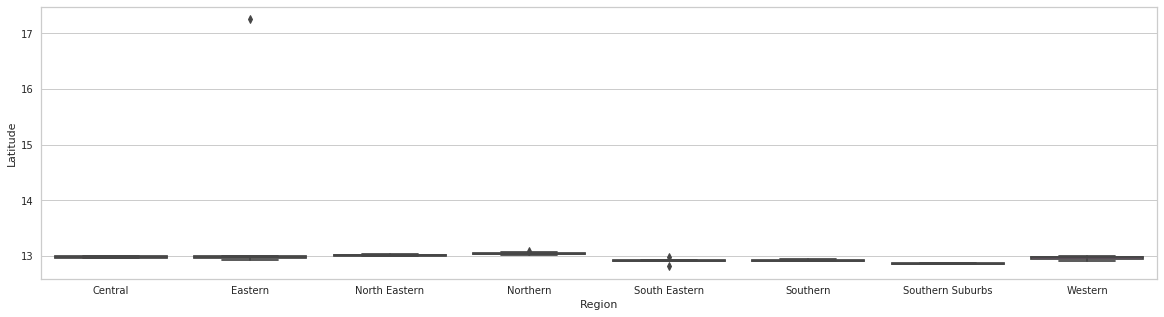

In [16]:
plt.figure(figsize=(20,5))
sns.boxplot(x=neighborhoods['Region'], y=neighborhoods['Latitude'], data=neighborhoods)

We can see an outlier in the Eastern regions. We will try getting rid of it

In [17]:
neighborhoods[neighborhoods['Region']=='Eastern']

,Region,Neighborhood,Latitude,Longitude
0,Eastern,Bellandur,12.979120,77.591300
1,Eastern,CV Raman Nagar,17.251068,80.165198
2,Eastern,Hoodi,12.991903,77.716201
3,Eastern,Krishnarajapuram,13.000509,77.675394
4,Eastern,Mahadevapura,12.993498,77.692416
5,Eastern,Marathahalli,12.955257,77.698416
6,Eastern,Varthur,12.940615,77.746994
7,Eastern,Whitefield,12.996400,77.761423


A variation of 5 degrees in latitude for a neighborhood in the same city is erroneous, therefore we can Google it and replace it with the correct value

In [18]:
neighborhoods.loc[neighborhoods['Neighborhood']=='CV Raman Nagar','Latitude'] = 12.9793
neighborhoods.loc[neighborhoods['Neighborhood']=='CV Raman Nagar','Longitude'] = 77.6642

In [19]:
neighborhoods[neighborhoods['Region']=='Eastern']

,Region,Neighborhood,Latitude,Longitude
0,Eastern,Bellandur,12.979120,77.591300
1,Eastern,CV Raman Nagar,12.979300,77.664200
2,Eastern,Hoodi,12.991903,77.716201
3,Eastern,Krishnarajapuram,13.000509,77.675394
4,Eastern,Mahadevapura,12.993498,77.692416
5,Eastern,Marathahalli,12.955257,77.698416
6,Eastern,Varthur,12.940615,77.746994
7,Eastern,Whitefield,12.996400,77.761423


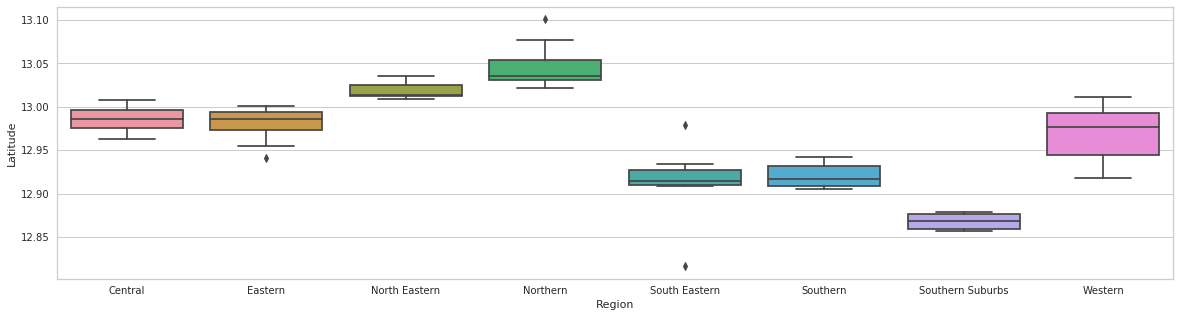

In [20]:
plt.figure(figsize=(20,5))
sns.boxplot(x=neighborhoods['Region'], y=neighborhoods['Latitude'], data=neighborhoods)

Since the variation of latitudes in the city is within 12.85-13.10 degrees, it is safe to say that all the coordinates are correct

To double check the coordinates, we will now examine the boxplot for longitudes

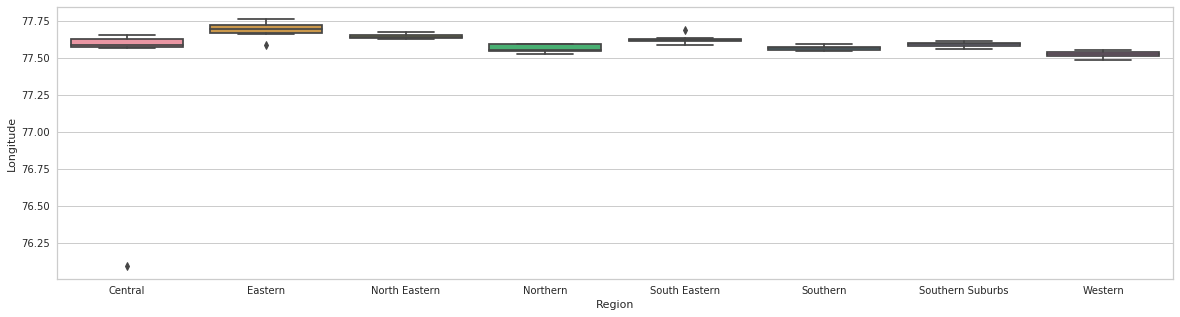

In [21]:
plt.figure(figsize=(20,5))
sns.boxplot(x=neighborhoods['Region'], y=neighborhoods['Longitude'], data=neighborhoods)

In [22]:
neighborhoods[neighborhoods['Longitude'] <=76.25]

,Region,Neighborhood,Latitude,Longitude
5,Central,Pete,12.999656,76.093298


We find one last outlier, therefore we can google the correct coordinates and enter them

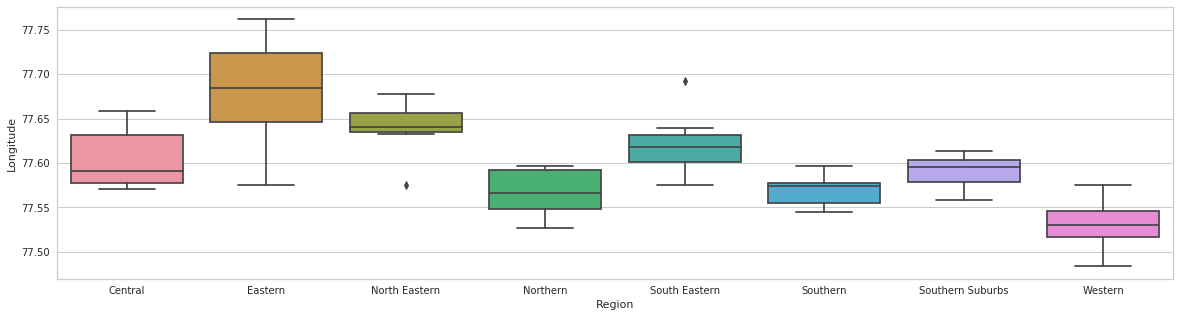

In [23]:
neighborhoods.loc[5, 'Latitude'] = 12.9627 
neighborhoods.loc[5, 'Longitude'] = 77.5758
plt.figure(figsize=(20,5))
sns.boxplot(x=neighborhoods['Region'], y=neighborhoods['Longitude'], data=neighborhoods)

Now the variation in longitudes is between 77.50 and 77.75, there it is now safe to say that all the coordinates are correct.

Our dataframe is now ready

In [24]:
neighborhoods.head()

,Region,Neighborhood,Latitude,Longitude
0,Central,Cantonment,12.979120,77.591300
1,Central,Domlur,12.962467,77.638196
2,Central,Indiranagar,12.973291,77.640467
3,Central,Jeevanbheemanagar,12.964200,77.658100
4,Central,Malleswaram,13.002735,77.570325


Now let's find the coordinates of Bangalore City, so that we can centre the map around that.

In [25]:
Bangalore_location = geolocator.geocode('Bangalore')
Latitude = Bangalore_location.latitude
Longitude = Bangalore_location.longitude
print('The coordinates of Bangalore are {},{}'.format(Latitude, Longitude))

The coordinates of Bangalore are 12.9791198,77.5912997


Let's plot all the neighborhoods on the map

In [26]:
bangalore_map = folium.Map(location=[Latitude, Longitude], zoom_start=10)

for lat, long, neighborhood, region in zip(neighborhoods['Latitude'] , neighborhoods['Longitude'] , neighborhoods['Neighborhood'], neighborhoods['Region']):
    
    label = '{}, {}'.format(neighborhood, region)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(location=[lat, long],
                                 popup=label,
                                 color='blue',
                                 fill=True,
                                 fill_color='#3186cc',
                                 fill_opacity=0.5,
                                 radius=5,
                                 parse_html=False).add_to(bangalore_map)


bangalore_map

## Getting the venues in all the neighborhoods in all the boroughs

We will enter our credentials to use Foursquare API

In [27]:
CLIENT_ID = 'WEZXAWILCFJJGUQME54IOZAU4HTTOW2UJCM4IBQQW0BAB2PL' # your Foursquare ID
CLIENT_SECRET = 'CHCA3UMMDMMYJM4SMKPSSIC0ORVW5L4S0N1QHYM2HUZHHOGF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Let's retrieve the json file for the required neighborhoods and their venues, from Foursquare

In [ ]:
RADIUS = 500
LIMIT = 500
venues_list = []
for name, lat, lng in zip(neighborhoods['Neighborhood'], neighborhoods['Latitude'], neighborhoods['Longitude']):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        for v in results:
            
            venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'])])
        
        
venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
venues

We will now group the data bu neighborhoods to see how many different categories exist in each neighborhood

In [ ]:
venues.groupby('Neighborhood').count()

In [ ]:
print('There are {} uniques categories.'.format(venues['Venue Category'].nunique()))

Now we will use one hot encoding so that we get a numerical value attached to the frequency of occurrence of each kind of category in every neighborhood

In [ ]:
# one hot encoding
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 


# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])

venues_onehot = venues_onehot[fixed_columns]
venues_onehot

We will now take their mean. The values below show the exact frequency of occurrence of each category in every neighborhood

In [ ]:
venues_grouped = venues_onehot.groupby('Neighborhood').mean().reset_index()
venues_grouped

Now we will create a function which takes individual rows for each neighborhood and sorts the 10 most common venues in descending order.

In [ ]:
def get_common_venues(row, n_venues):
    
    row_categories = row.iloc[1:]
    row_sorted = row_categories.sort_values(ascending=False)
    return row_sorted.index.values[0:n_venues]

Let's create a dataframe

In [ ]:
suffix = ['st', 'nd', 'rd']
columns = ['Neighborhood']


for i in range(1,11):
    
    try:
        columns.append('{}{} most common venue'.format(i,suffix[i-1]))
        
    except:
        columns.append('{}th most common venue'.format(i))
        

        
category_sorted = pd.DataFrame(columns=columns)        
        
    
    
category_sorted

Now let's fill the dataframe

In [ ]:
category_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for i in np.arange(venues_grouped.shape[0]):
    
    category_sorted.iloc[i, 1:] = get_common_venues(venues_grouped.iloc[i,:], 10)
    

category_sorted.head()  

In [ ]:
category_sorted.shape

## Clustering the neighborhoods based on the venues

In [ ]:
cluster_df = venues_grouped.iloc[:, 1:]
cluster_df.head()

In [ ]:
cluster_df.shape

We will use the KElbowVisualizer function in the yellowbrick package to find the optimum value of K for clustering

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=range(1,10))
visualizer.fit(cluster_df)
visualizer.show()

We obtain the elbow point at k=3. Therefore we will perform K-means clustering for k=3

In [ ]:
k = 3   # No. of clusters 
k_means = KMeans(n_clusters=k, random_state=4)

In [ ]:
clustering = k_means.fit(cluster_df)
cluster_label = clustering.labels_ 
cluster_label

In [ ]:
clustered_neigborhoods = category_sorted
clustered_neigborhoods['Cluster'] = cluster_label
clustered_neigborhoods

In [ ]:
# To see the no. of neighborhoods in each cluster
cluster_dist = pd.DataFrame(clustered_neigborhoods.groupby('Cluster')['Neighborhood'].count())
cluster_dist

Let's see the distribution of the neighborhoods over the 3 clusters

In [ ]:
cluster_dist.plot(kind='bar')

Below is the final dataframe which has the all the regions, neighborhoods, their coordinates, the 10 most common venues in them and the clusters the neighborhoods lie in

In [ ]:
final_df = pd.merge(neighborhoods, clustered_neigborhoods, how='right', on='Neighborhood')
final_df

In [ ]:
final_df.drop(['Cluster'], axis=1, inplace=True)

In [ ]:
final_df.insert(4, 'Cluster', cluster_label)
final_df

## Display of clusters on the map

In [ ]:
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_df['Latitude'], final_df['Longitude'], final_df['Neighborhood'], final_df['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining all the clusters

### Cluster 0

In [ ]:
final_df.loc[final_df['Cluster']==0, final_df.columns[[1] + list(range(5, final_df.shape[1]))]]

### Cluster 1

In [ ]:
final_df.loc[final_df['Cluster']==1, final_df.columns[[1] + list(range(5, final_df.shape[1]))]]

### Cluster 2

In [ ]:
final_df.loc[final_df['Cluster']==2, final_df.columns[[1] + list(range(5, final_df.shape[1]))]]